In [2]:
#[print(f"{key}: {value}") for key, value in plt.rcParams.items() if value == 'white'];

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
plt.rcParams['figure.facecolor'] = '.0'
plt.rcParams['axes.facecolor'] = '.1'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
plt.rcParams['axes.edgecolor'] = 'purple'

In [4]:
x = np.linspace(0, 10, 100)

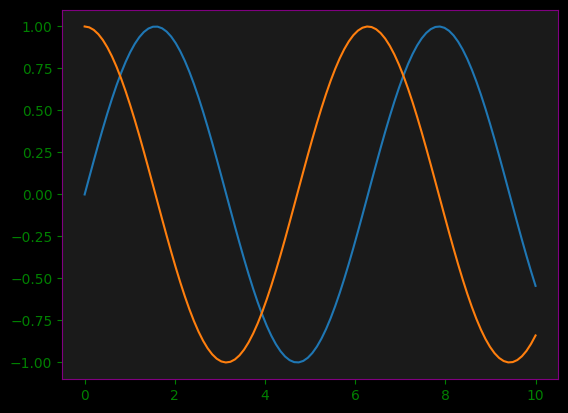

In [5]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.savefig('my_figure.png')

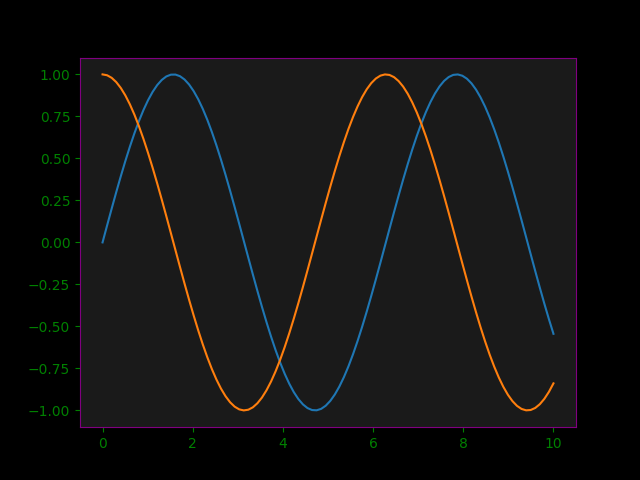

In [6]:
Image('my_figure.png')

In [7]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

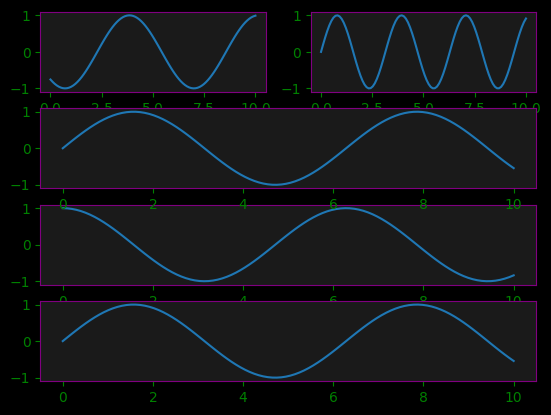

In [8]:
plt.figure()

plt.subplot(4,2,1) #(rows, columns, panel number)
plt.plot(x, np.sin(4+x))

plt.subplot(422)
plt.plot(x, np.sin(2*x))

plt.subplot(413)#you might aswell just omit comma
plt.plot(x, np.cos(x))

plt.subplot(412)
plt.plot(x, np.sin(x))

plt.subplot(414)
plt.plot(x, np.sin(x));

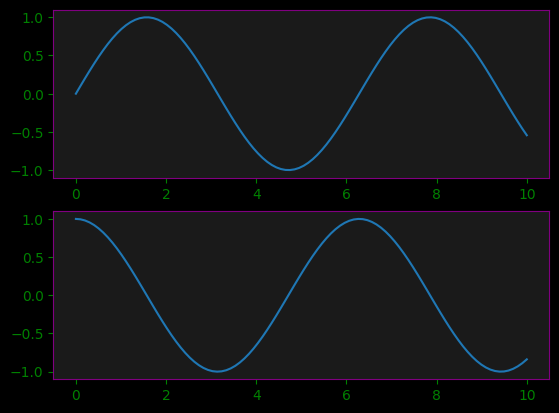

In [9]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

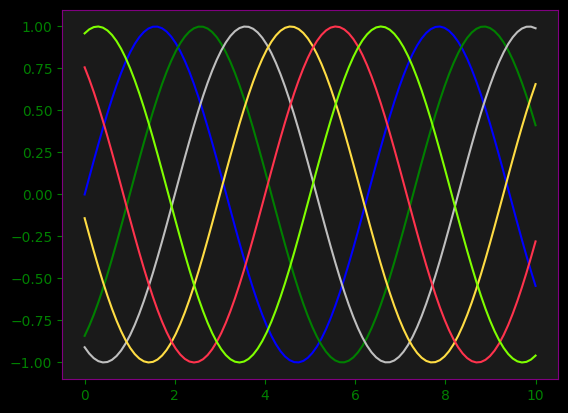

In [10]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

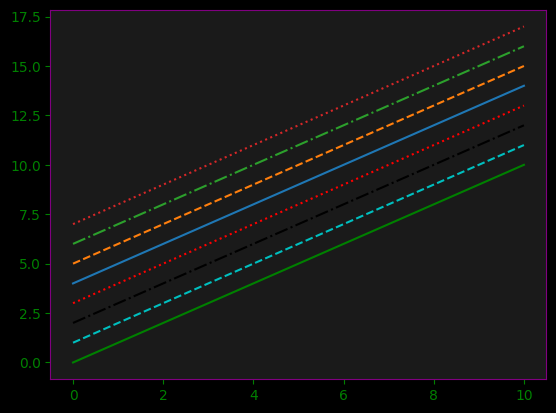

In [36]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

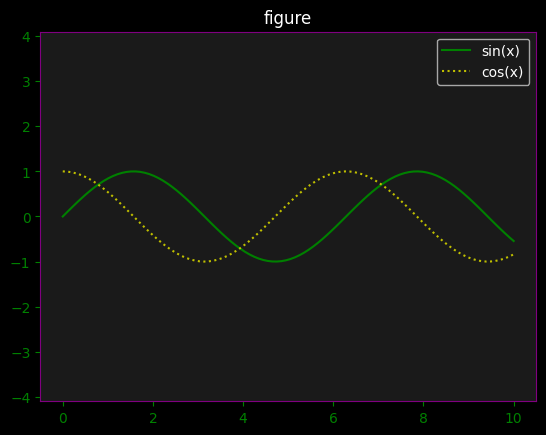

In [12]:
plt.title('figure')
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':y', label='cos(x)')
plt.axis('equal')

plt.legend();

plt.xlabel() → ax.set_xlabel()

plt.ylabel() → ax.set_ylabel()

plt.xlim() → ax.set_xlim()

plt.ylim() → ax.set_ylim()

plt.title() → ax.set_title()

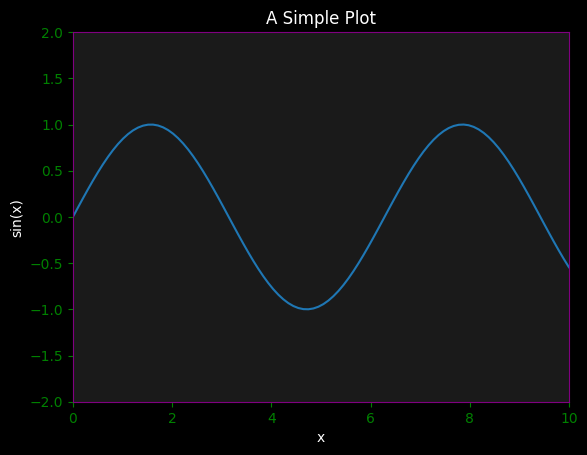

In [13]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

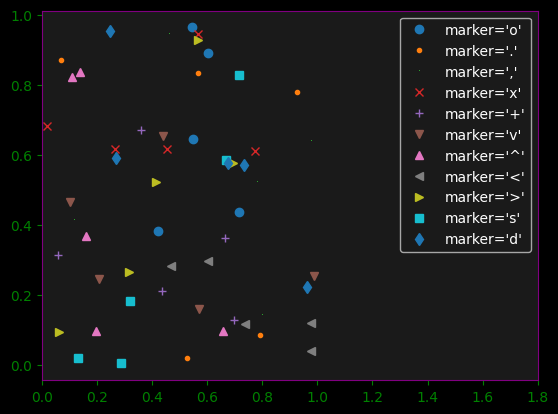

In [14]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

In [15]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

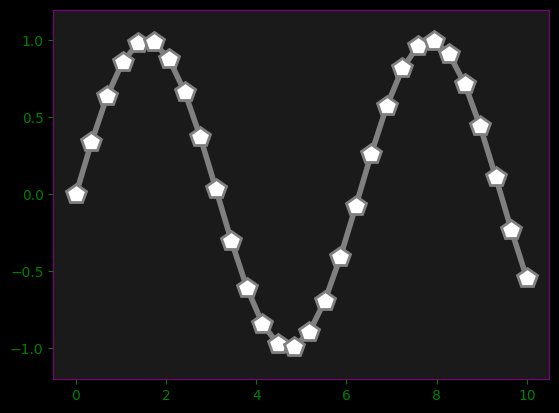

In [16]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

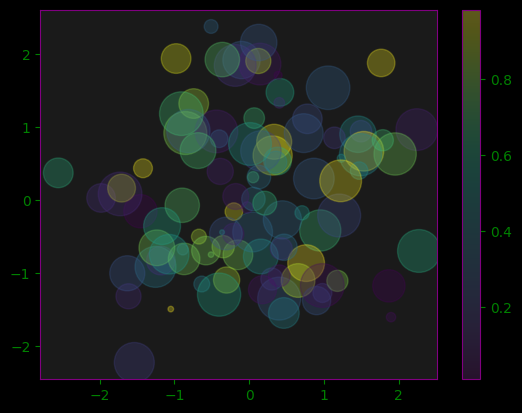

In [17]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

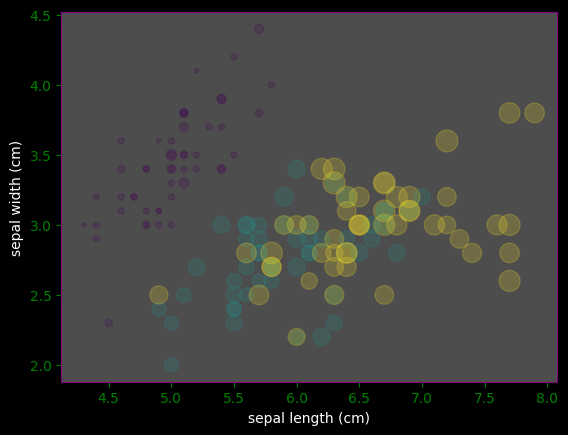

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.gca().set_facecolor('.3')

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

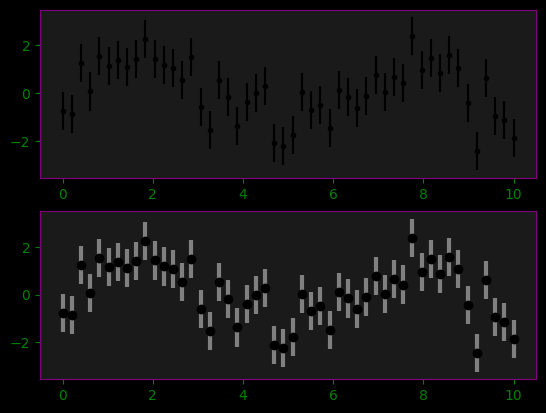

In [35]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)


plt.figure()

plt.subplot(2,1,1)
plt.errorbar(x, y, yerr=dy, fmt='.k');

plt.subplot(2,1,2)
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='gray', elinewidth=3, capsize=0);

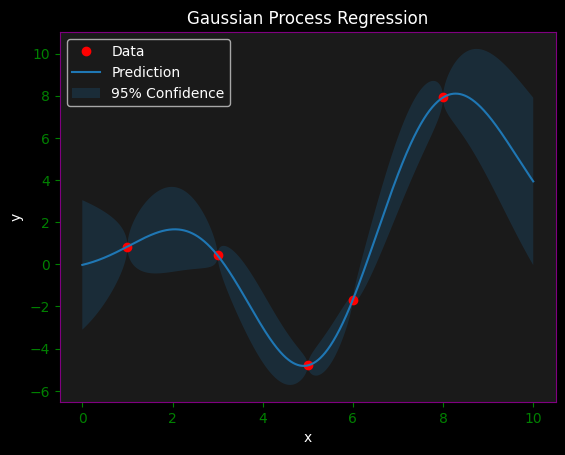

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)


kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)

confidence = 1.96 * np.sqrt(MSE)

plt.figure()
plt.plot(xdata, ydata, 'ro', label='Data')
plt.plot(xfit, yfit, '-', label='Prediction')
plt.fill_between(xfit, yfit - confidence, yfit + confidence, alpha=0.2, label='95% Confidence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.title('Gaussian Process Regression')
plt.show()

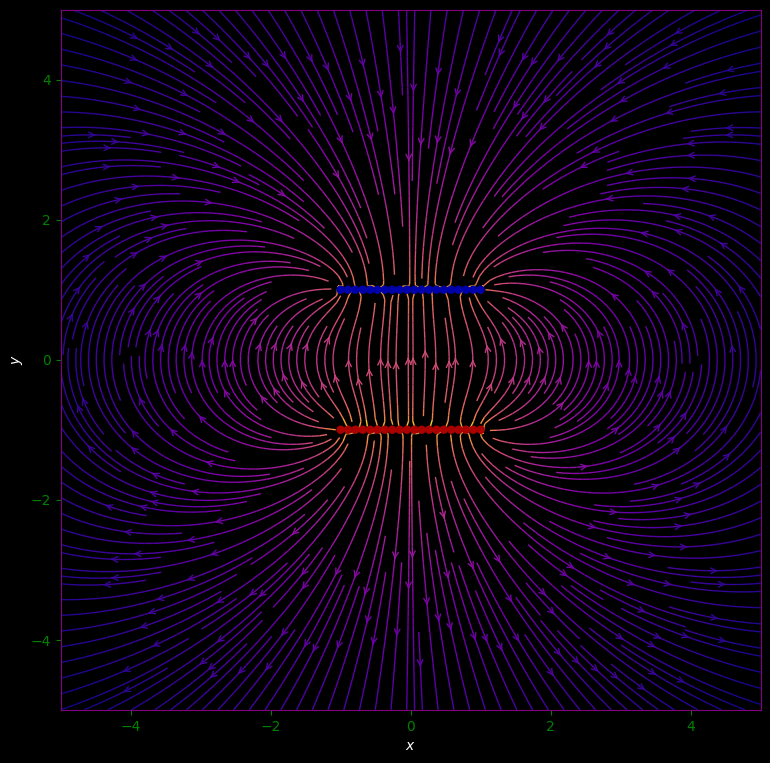

In [45]:
#source: https://scipython.com/blog/the-electric-field-of-a-capacitor/

import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

WIDTH, HEIGHT, DPI = 700, 700, 100

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = ((x-r0[0])**2 + (y-r0[1])**2)**1.5
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 128, 128
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)

# Create a capacitor, represented by two rows of nq opposite charges separated
# by distance d. If d is very small (e.g. 0.1), this looks like a polarized
# disc.
nq, d = 20, 2
charges = []
for i in range(nq):
    charges.append((1, (i/(nq-1)*2-1, -d/2)))
    charges.append((-1, (i/(nq-1)*2-1, d/2)))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure(figsize=(WIDTH/DPI, HEIGHT/DPI), facecolor='k')
ax = fig.add_subplot(facecolor='k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.plasma,
              density=3, arrowstyle='->')

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0], zorder=10))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')
plt.savefig('capacitor.png', dpi=DPI)
plt.show()